# Project 02 - Image Processing

## Student Information

- Full name: Dương Trung Nghĩa
- Student ID: 22127293
- Class: 22CLC05

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Function Definitions

In [23]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        numpy.ndarray
    '''

    # YOUR CODE HERE
    return np.array(Image.open(img_path))

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : numpy.ndarray
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img,'gray')
    plt.axis('off')
    plt.show()
    
def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : numpy.ndarray
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    image = Image.fromarray(img)
    image.save(img_path)

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def brightness(img, bias):
    '''
    Adjust the brightness of an image by adding 'bias to each pixel value.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.
    bias: int
        The amount to adjust the brightness. Positive values increase brightness, while negative values decrease brightness.
        
    Returns
    -------
        numpy.ndarray
    '''
    bri_img = img.astype('uint16') + bias
    res = np.clip(bri_img, 0, 255).astype('uint8')
    return res

def contrast(img, bias):
    '''
    Adjust the contrast of an image using a bias.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.
    bias : int
        The contrast adjustment value. Positive values increase contrast, while negative values decrease contrast.
    
    Returns
    -------
        numpy.ndarray
    '''
    contrast_img = img.astype('uint16') * bias
    res = np.clip(contrast_img,0,255).astype('uint8')
    return res

def flip(img,mode):
    '''
    Flip the image vertically or horizontally.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.
    mode : str
        Flip mode, either 'vertical' or 'horizontal'.

    Returns
    -------
        numpy.ndarray
    '''
    if mode == 'vertical':
        res = img[::-1]
    elif mode == 'horizontal':
        res = img[:,::-1]
    else:
        res = img[::-1]
    return res

def gray(img):
    '''
    Convert an image to grayscale.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.

    Returns
    -------
        numpy.ndarray
    '''
    gray_filter = np.array([0.3, 0.59, 0.11],dtype=np.float32)
    gray_image = np.dot(img[..., :3], gray_filter)
    res = np.clip(gray_image, 0, 255).astype('uint8')
    return res

def sepia(img):
    '''
    Convert an image to sepia.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.

    Returns
    -------
        numpy.ndarray
    '''
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]],dtype=np.float32)
    sepia_image = np.dot(img,sepia_filter.T)
    res = np.clip(sepia_image, 0, 255).astype('uint8')
    return res

def kernel_initial(mode = 'blur'):
    '''
    Initialize a convolution kernel for blurring or sharpening an image.

    Parameters
    ----------
    mode : str, optional
        Kernel type, either 'blur' or 'sharpen'. Default is 'blur'.

    Returns
    -------
        numpy.ndarray
    '''
    if mode == 'blur':
        kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]], dtype=np.float32) / 16
    elif mode == 'sharpen':
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=np.float32)
    else:
        kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]], dtype=np.float32) / 16
    return kernel
    
def convolution(img, mode = 'blur'):
    '''
    Apply a blur/sharpen filter to an image.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.
    mode : str
        Convolution mode, either 'blur' or 'sharpen'.
        
    Returns
    -------
        numpy.ndarray
    '''
    kernel = kernel_initial(mode)
    height, width, channels = img.shape
    res = np.zeros_like(img, dtype=np.float32)

    padded_img = np.pad(img, ((1, 1), (1, 1), (0, 0)), mode='edge')

    for c in range(channels):
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                res[:, :, c] += padded_img[i:i + height, j:j + width, c] * kernel[i,j]
    res = np.clip(res, 0, 255).astype('uint8')
    
    return res
    
def center_crop(img, size = 256):
    '''
    Crop the center of the image to the specified size.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.

    Returns
    -------
        numpy.ndarray
    '''
    height, width, _ = img.shape
    left = (width - size)//2
    top = (height - size)//2
    bottom = top + size
    right = left + size
    res = img[top:bottom,left:right,:]
    return res
    
def circle_crop(img):
    '''
    Crop the image into a circular shape.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.

    Returns
    -------
        numpy.ndarray
    '''
    height, width, _ = img.shape
    center = (width // 2, height // 2)
    y, x = np.ogrid[:height, :width]
    radius = min(center)
    mask = (x - center[1]) ** 2 + (y - center[0]) ** 2 > radius ** 2
    res = np.array(img)
    res[mask] = 0
    return res
    
def ellipse_crop(img):
    '''
    Crop the image into a shape defined by the intersection of two diagonal ellipses.

    Parameters
    ----------
    img : numpy.ndarray
        Image as a numpy array.

    Returns
    -------
        numpy.ndarray
    '''
    center = np.array([img.shape[0] / 2, img.shape[1] / 2])
    a = min(img.shape[0], img.shape[1]) * (np.sqrt(2)/4)
    b = np.sqrt(3) * a


    y, x = np.ogrid[:img.shape[0], :img.shape[1]]

    x_centered = x - center[1]
    y_centered = y - center[0]

    ellipse_1 = ((x_centered * np.cos(3 * np.pi / 4) + y_centered * np.sin(3 * np.pi / 4)) ** 2) / (b ** 2) + ((x_centered * np.sin(3 * np.pi / 4) - y_centered * np.cos(3 * np.pi / 4)) ** 2) / (a ** 2)
    ellipse_2 = ((x_centered * np.cos(np.pi / 4) + y_centered * np.sin(np.pi / 4)) ** 2) / (b ** 2) + ((x_centered * np.sin(np.pi / 4) - y_centered * np.cos(np.pi / 4)) ** 2) / (a ** 2)
    
    res = np.array(img)
    mask = (ellipse_1 > 1) & (ellipse_2 > 1)
    res[mask] = 0

    return res


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

## Main FUNCTION

In [27]:
def main():
    img_path = input("Input image's path: ")
    img = read_img(rf"{img_path}")

    print("Choose an image processing function:")
    print("1. Brightness")
    print("2. Contrast")
    print("3. Flip")
    print("4. Gray")
    print("5. Sepia")
    print("6. Blur")
    print("7. Sharpen")
    print("8. Center Crop")
    print("9. Circle Crop")
    print("10. Ellipse Crop")
    print("0. All functions")

    choice = int(input("Enter your choice (0-10): "))

    def process_image(img, choice):
        if choice == 1:
            return [(brightness(img, 35), 'brightness')]
        elif choice == 2:
            return [(contrast(img, 2.5), 'contrast')]
        elif choice == 3:
            flip_images = []
            flip_images.append((flip(img, 'vertical'), 'flip_vertical'))
            flip_images.append((flip(img, 'horizontal'), 'flip_horizontal'))
            return flip_images
        elif choice == 4:
            return [(gray(img), 'gray')]
        elif choice == 5:
            return [(sepia(img), 'sepia')]
        elif choice == 6:
            return [(convolution(img, 'blur'), 'blur')]
        elif choice == 7:
            return [(convolution(img, 'sharpen'), 'sharpen')]
        elif choice == 8:
            return [(center_crop(img), 'center_crop')]
        elif choice == 9:
            return [(circle_crop(img), 'circle_crop')]
        elif choice == 10:
            return [(ellipse_crop(img), 'ellipse_crop')]
        else:
            return []

    if choice == 0:
        images = [
            (brightness(img, 35), 'brightness'),
            (contrast(img, 2.5), 'contrast'),
            (flip(img, 'vertical'), 'flip_vertical'),
            (flip(img, 'horizontal'), 'flip_horizontal'),
            (gray(img), 'gray'),
            (sepia(img), 'sepia'),
            (convolution(img, 'blur'), 'blur'),
            (convolution(img, 'sharpen'), 'sharpen'),
            (center_crop(img), 'center_crop'),
            (circle_crop(img), 'circle_crop'),
            (ellipse_crop(img), 'ellipse_crop')
        ]
    else:
        images = process_image(img, choice)

    last_dot = img_path.rfind('.')
    filename = img_path[:last_dot]
    extension = img_path[last_dot:]

    for img, key in images:
        img_path = f"{filename}_{key}{extension}"
        print(key)
        show_img(img)
        save_img(img, img_path)



Input image's path:  C:\Users\TRUNG NGHIA\Downloads\2.jpg


Choose an image processing function:
1. Brightness
2. Contrast
3. Flip
4. Gray
5. Sepia
6. Blur
7. Sharpen
8. Center Crop
9. Circle Crop
10. Ellipse Crop
0. All functions


Enter your choice (0-10):  0


brightness


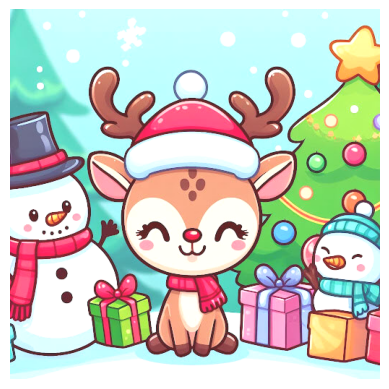

contrast


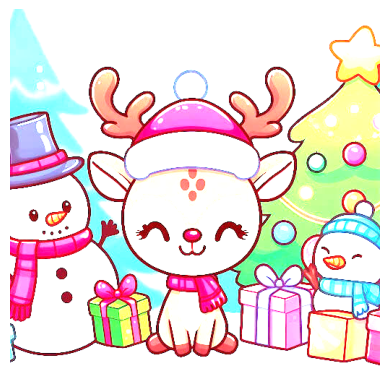

flip_vertical


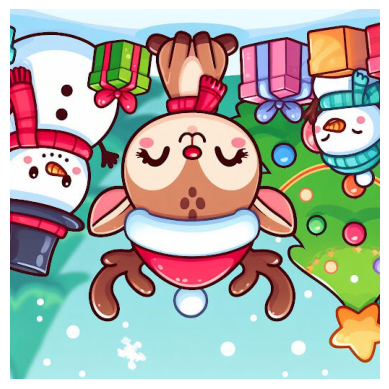

flip_horizontal


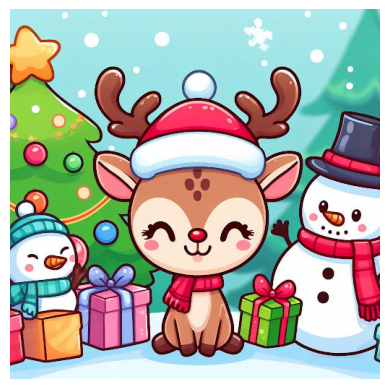

gray


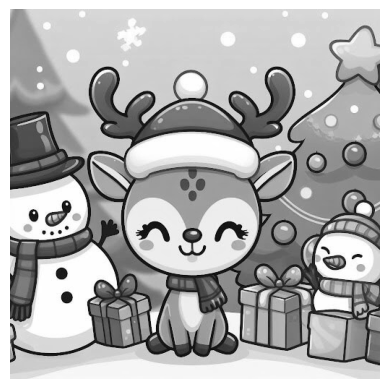

sepia


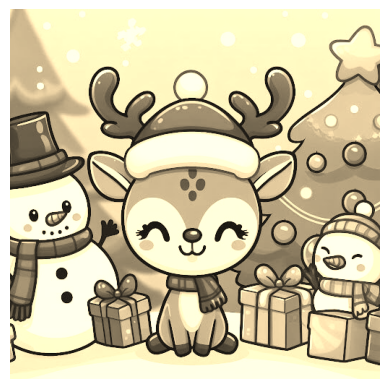

blur


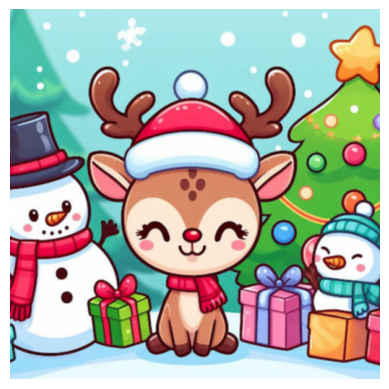

sharpen


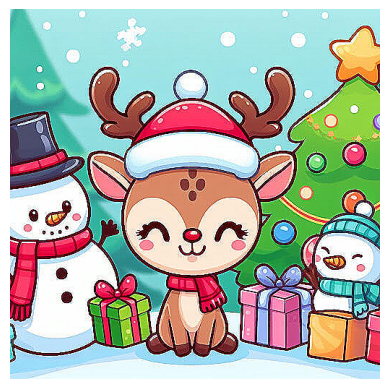

center_crop


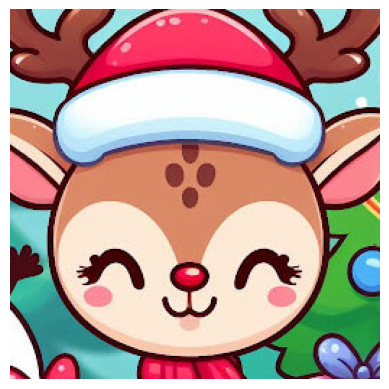

circle_crop


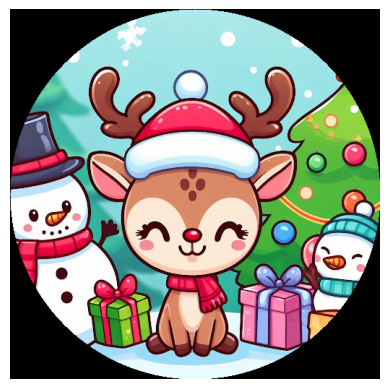

ellipse_crop


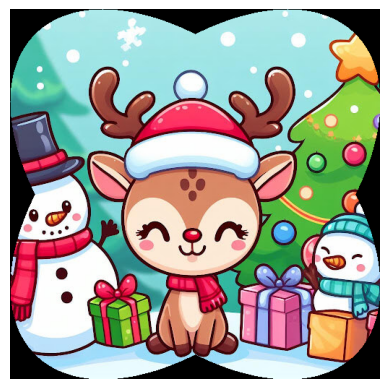

In [29]:
# Call main function
main()